In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data={
    'Student_ID':range(1,21),
    'Math_Score':[88,92,80,70,65,95,85,78,90,100,45,60,75,85,95,55,65,70,80,90],
    'Reading_Score':[85,90,78,72,68,88,82,75,89,95,50,65,70,80,90,60,70,75,85,92],
    'Writing_Score':[80, 85, 75, 70,65,90,80,72,88,93,48,62,68,78,88,58,68,72,82,90],
    'Attendance_Rate':[0.95,0.9,0.85,0.8,0.75,0.98,0.88,0.82,0.9,1.0,0.6,0.7,0.78,0.85,0.92,0.65,0.75,0.8,0.88,0.9]
}
df=pd.DataFrame(data)

In [5]:
df.loc[3,"Math_Score"]=np.nan

In [6]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Student_ID  Math_Score  Reading_Score  Writing_Score  Attendance_Rate
0           1        88.0             85             80             0.95
1           2        92.0             90             85             0.90
2           3        80.0             78             75             0.85
3           4         NaN             72             70             0.80
4           5        65.0             68             65             0.75


In [7]:
print("Missing values in each column: ")
print(df.isnull().sum())

Missing values in each column: 
Student_ID         0
Math_Score         1
Reading_Score      0
Writing_Score      0
Attendance_Rate    0
dtype: int64


In [8]:
df['Math_Score'].fillna(df['Math_Score'].mean(),inplace=True)

In [9]:
print("Missing values after imputation: ")
print(df.isnull().sum())

Missing values after imputation: 
Student_ID         0
Math_Score         0
Reading_Score      0
Writing_Score      0
Attendance_Rate    0
dtype: int64


In [10]:
print("Updated dataset: ")
print(df.head())

Updated dataset: 
   Student_ID  Math_Score  Reading_Score  Writing_Score  Attendance_Rate
0           1   88.000000             85             80             0.95
1           2   92.000000             90             85             0.90
2           3   80.000000             78             75             0.85
3           4   78.578947             72             70             0.80
4           5   65.000000             68             65             0.75


In [11]:
numeric_columns=['Math_Score','Reading_Score','Writing_Score','Attendance_Rate']

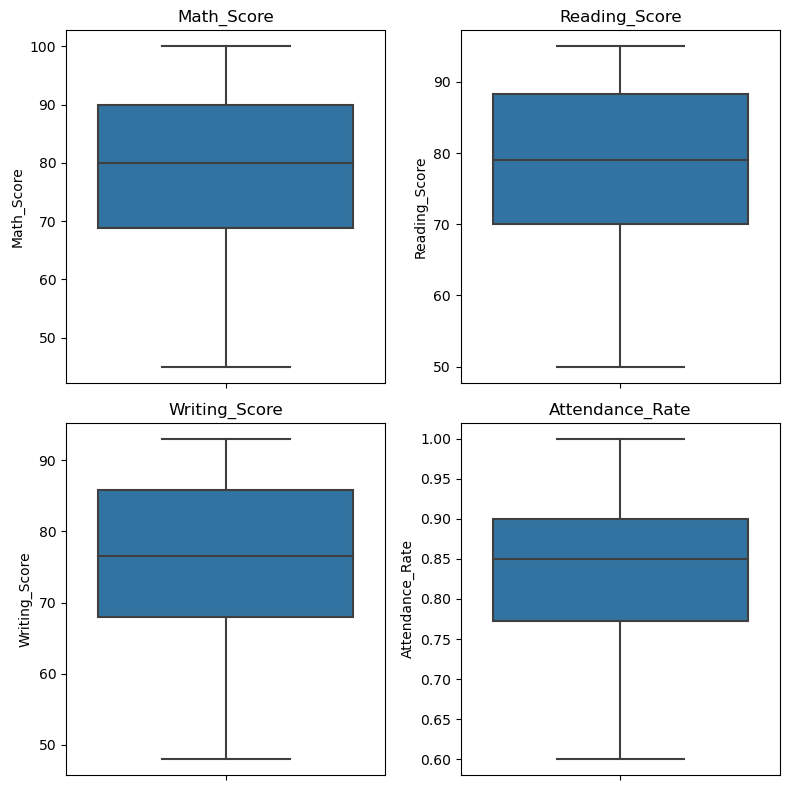

In [12]:
plt.figure(figsize=(8,8))
for  i,col in enumerate(numeric_columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
for col in numeric_columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    
    df[col]=df[col].clip(lower=lower_bound, upper = upper_bound)
print("Descriptive statistics after handling outliers: ")
print(df[numeric_columns].describe())

Descriptive statistics after handling outliers: 
       Math_Score  Reading_Score  Writing_Score  Attendance_Rate
count   20.000000      20.000000      20.000000        20.000000
mean    78.578947      77.950000      75.600000         0.833000
std     14.687323      11.856488      12.010522         0.106034
min     45.000000      50.000000      48.000000         0.600000
25%     68.750000      70.000000      68.000000         0.772500
50%     80.000000      79.000000      76.500000         0.850000
75%     90.000000      88.250000      85.750000         0.900000
max    100.000000      95.000000      93.000000         1.000000


In [14]:
df['Math_Score_log']=np.log(df['Math_Score'])

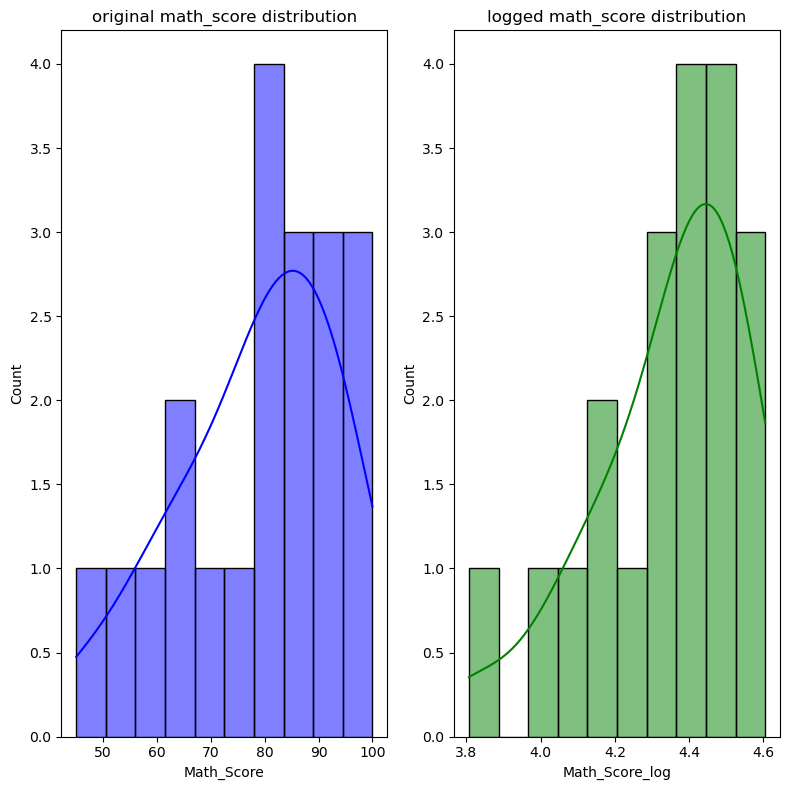

In [15]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.histplot(df['Math_Score'],kde=True,bins=10,color='blue')
plt.title('original math_score distribution')

plt.subplot(1,2,2)
sns.histplot(df['Math_Score_log'],kde=True,bins=10,color='green')
plt.title('logged math_score distribution')

plt.tight_layout()
plt.show()